<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M77_Py_ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN: k-nearest neighbors

This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **age:** The age of the insurance policyholder.
* **is_male:** A binary indicator of the policyholder's gender (1 for male, 0 for not male).
* **engine_size:**  The size of the engine in the insured vehicle (the units are not specified but could be cubic centimeters or liters).
* **months_last_claim:** The number of months since the policyholder's last claim.
* **fraud:** A binary indicator of whether the claim was fraudulent (1 for fraudulent, 0 for not fraudulent).



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


A train-test split divides data to train and evaluate a model on unseen data, preventing overfitting and providing a better measure of generalization. Random splitting, maintaining data distribution, and stratified sampling (for imbalanced data) are important considerations.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','is_male','engine_size','months_last_claim']],df['fraud'] ,test_size=0.20)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
18,44,0,200,6
14,58,0,70,12
36,44,1,70,6


KNN are sensitive to feature scaling because they aim to maximize the margin between data points, and features with larger scales can disproportionately influence this margin calculation, leading to suboptimal decision boundaries.

Let's use MinMaxScaler to calculates the min/max of each column and scales the data. The result is converted back to a DataFrame (df_scaled) with the original column names.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns = df.columns)
df_scaled

,age,is_male,engine_size,months_last_claim,fraud
0,0.743243,0.0,0.384615,1.000000,1.0
1,0.324324,0.0,0.000000,0.333333,1.0
2,0.837838,0.0,1.000000,0.333333,0.0
3,0.202703,1.0,0.384615,0.000000,1.0
4,0.216216,1.0,0.384615,0.333333,0.0
...,...,...,...,...,...
95,0.743243,1.0,1.000000,1.000000,1.0
96,0.905405,0.0,0.000000,1.000000,0.0
97,0.540541,1.0,1.000000,0.000000,0.0
98,0.067568,0.0,0.384615,0.333333,1.0


K-Nearest Neighbors (KNN) is a simple supervised learning algorithm for classification and regression. It classifies or predicts a new data point based on the majority class or average value of its k nearest neighbors in the training data. The process involves choosing k, calculating distances to all training points, finding the k closest, and assigning the most frequent class (classification) or average value (regression). Key considerations include the choice of k, the distance metric, and feature scaling, as these factors impact performance. While intuitive, KNN can be computationally expensive with large datasets.

![](https://miro.medium.com/v2/resize:fit:1400/1*R9P-psALmaTA8r0s9dNECQ.gif)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
train_accuracy= knn.score(X_train,y_train)*100
print(train_accuracy)
knn.predict(X_test)

82.5


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

Hyperparameter tuning is the process of optimizing these hyperparameters to achieve peak model performance. This involves exploring different combinations of hyperparameter values, employing techniques such as grid search (exhaustive search over a defined set of values) or random search (random sampling of hyperparameter combinations). The goal is to identify the hyperparameter configuration that yields the best model performance on a given task.

In [ ]:
for k in range(3,20,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_accuracy= knn.score(X_train,y_train)*100
  print(k,train_accuracy)

3 82.5
4 72.5
5 70.0
6 72.5
7 65.0
8 62.5
9 65.0
10 66.25
11 65.0
12 62.5
13 66.25
14 62.5
15 65.0
16 62.5
17 65.0
18 60.0
19 60.0


We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

In [ ]:
from sklearn.metrics import accuracy_score
preds = knn.predict(X_test)
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

50.0

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions

[[5 5]
 [5 5]]


<Axes: >

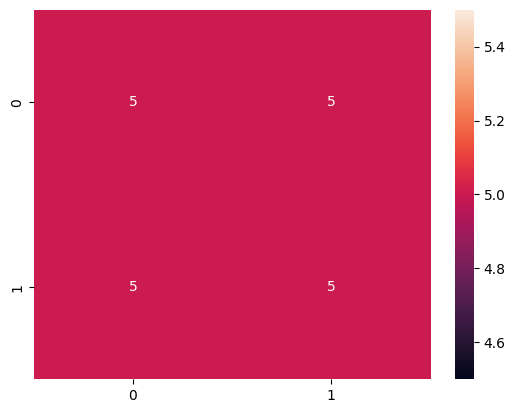

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



# Activity: KNN

Build a machine learning model to predict insurance claims. Explore and clean the dataset, handle missing values and outliers. Prepare the data by encoding categorical features and splitting it into training and testing sets. Choose a suitable classification algorithm (**KNN**) and train it on the training data. Evaluate the model's performance on the testing data using metrics like accuracy, precision, and recall. Submit a report summarizing your approach, data preprocessing, model selection, evaluation, and insights, along with the trained model and code.  

data: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/auto%20-%20class.csv`



***Dataset***: This dataset could be used to build a machine learning model to predict the likelihood of a claim being filed based on various factors like age, vehicle age, and previous insurance history.


* **is_male:** Binary variable indicating whether the policyholder is male (1) or female (0).
* **Age:** Age of the policyholder.
* **Driving_License:** Binary variable indicating whether the policyholder has a driving license (1) or not (0).
* **Region_Code:** Numerical code representing the geographic region.
* **Previously_Insured:** Binary variable indicating whether the policyholder had previous insurance (1) or not (0).
* **Vehicle_Age:** Age of the vehicle.
* **Vehicle_Damage:** Binary variable indicating whether the vehicle has previously been damaged (1) or not (0).
* **Policy_Sales_Channel:** Numerical code representing the sales channel through which the policy was purchased.
* **Vintage:** Duration of the policy in days.
* **Annual_Premium:** Annual premium amount.
* **claim:** Binary variable indicating whether a claim was filed (1) or not (0).

